In [1]:
# This notebook was created by Prisha Jain

In [2]:
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#working with level3_atm data
data1 = fits.open(r"C:\Users\prish\Downloads\emm\data\emr\l3atm\2021\08\emm_emr_l3atm_20210801t085726_0088_r_v01-16.fits")

In [4]:
data_a=Table(data1[1].data)
temp = data_a['temp'].data

In [5]:
lat = data_a['latitude'].data
lon = data_a['longitude'].data
alt = data_a['sc_altitude'].data

In [6]:
lon_new=np.zeros((lon.shape[0],temp.shape[1]))
lat_new=np.zeros((lat.shape[0],temp.shape[1]))
alt_new=np.zeros((alt.shape[0],temp.shape[1]))

In [7]:
for i in range(20):
    lon_new[:,i]=lon
    lat_new[:,i]=lat
    alt_new[:,i]=alt

In [8]:
lon_final=lon_new.flatten()
lat_final=lat_new.flatten()
alt_final=alt_new.flatten()
temp_final=temp.flatten()

In [9]:
#removing wrong data points
a=np.where(lat_final==0)
b=np.where(alt_final==0)
c=np.where(lon_final==0)
p= a or b or c

In [10]:
lat_final=np.delete(lat_final,p)
lon_final=np.delete(lon_final,p)
alt_final=np.delete(alt_final,p)
temp_final=np.delete(temp_final,p)

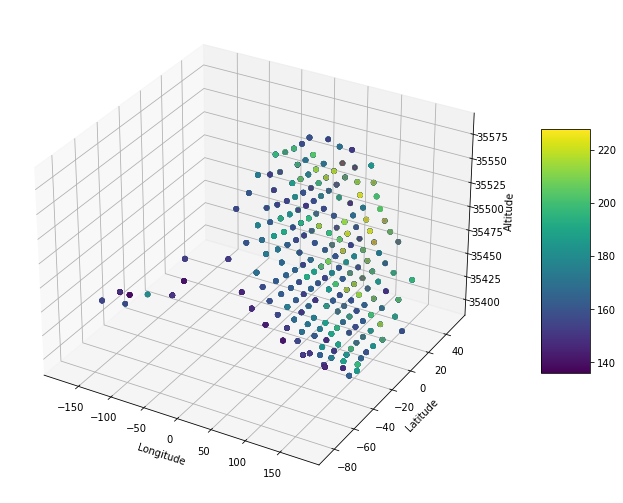

In [11]:
# making a 3D plot, where the X axis represents Longitude, Y axis represents Latitude and the Z axis represents Altitude. We plot the atmospheric data in this plot
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection='3d')
p=ax.scatter3D(lon_final, lat_final, alt_final, c=temp_final)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Altitude')
fig.colorbar(p, ax = ax, shrink = 0.5, aspect = 5)

In [12]:
level=np.zeros((temp_final.shape[0]//20,20))
for i in range (20):
    level[:,i]=i+1;

In [13]:
level_final=level.flatten()

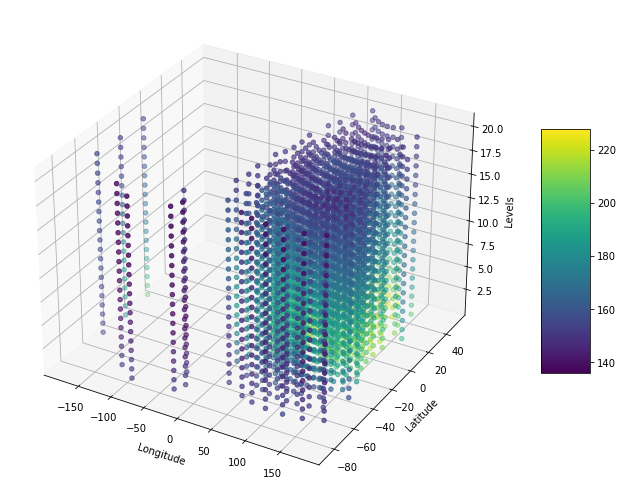

In [14]:
# making a 3D plot, where the X axis represents Longitude, Y axis represents Latitude and the Z axis represents the 20 different levels. We plot the atmospheric data in this plot so that we can see the atmospheric temperature data for each level.
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection='3d')
k=ax.scatter3D(lon_final, lat_final, level_final, c=temp_final)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Levels')
fig.colorbar(k, ax = ax, shrink = 0.5, aspect = 5)